# 1. 데이터 전처리 리뷰

In [1]:
#creditset.csv 를 읽으셔서
#결측치 확인, imputing
#default10yr를 y, 나머지->X
#X, y를 각각 파티셔닝
#X_train로 스케일러 fitting
#스케일러->train, test transform

import pandas as pd
df = pd.read_csv("creditset.csv")
df.isnull().mean()  #df.describe()
y = df.default10yr
X = df.drop("default10yr", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


 - Credit 데이터로 연습을 위한 데이터 읽고 생성하기

In [ ]:
import random
import pandas as pd
import numpy as np

data = pd.read_csv('crx.data', header=None)
varnames = ['A'+str(s) for s in range(1,17)]
data.columns = varnames
data = data.replace('?', np.nan)

#re-cast to float
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

#recode target as binary
data['A16'] = data['A16'].map({'+':1, '-':0})

cat_cols = [c for c in data.columns if data[c].dtypes=='O']	#범주형 변수
num_cols = [c for c in data.columns if data[c].dtypes!='O']	#수치형 변수

#missing 처리
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Missing')

data.to_csv('creditApprovalUCI.csv', index=False)

- Imputing+Partitionig+Scaling

In [ ]:
#standard scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')
data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']] #수치형 변수로 구성된 data_num
columns_name = data_num.columns

imputer = SimpleImputer(strategy='median')
data_num = imputer.fit_transform(data_num)
data_num.shape
data_num_df = pd.DataFrame(data_num, columns = columns_name)
data_num_df

,A2,A3,A8,A11,A15
0,30.83,0.000,1.25,1.0,0.0
1,58.67,4.460,3.04,6.0,560.0
2,24.50,0.500,1.50,0.0,824.0
3,27.83,1.540,3.75,5.0,3.0
4,20.17,5.625,1.71,0.0,0.0
...,...,...,...,...,...
685,21.08,10.085,1.25,0.0,0.0
686,22.67,0.750,2.00,2.0,394.0
687,25.25,13.500,2.00,1.0,1.0
688,17.92,0.205,0.04,0.0,750.0


In [ ]:
X_train, X_test = train_test_split( data_num_df, test_size=0.3)
print(X_train.shape, X_test.shape)

(483, 5) (207, 5)


In [ ]:
scaler = StandardScaler()

#X_train만 스케일링할 경우
X_train_scaled = scaler.fit_transform(X_train)

#X_train의 평균, 표준편차로 다른 데이터프레임도 스케일링 할 경우
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #다만, 변환 후에는 numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
#minmax scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

- One Hot Encoding
 - onehot encoding
 - 예: 성별->각 범주가 컬럼이 되고, 값은 1또는 0 또는 한 변수에서 값이 1과 0
 - 범주 수(k)-1개의 변수로 표현
 - 경우에 따라 범주 개수 만큼의 변수로 인코딩할 수 있음:
 - DT와 같이 재귀적이고 분할하여 모델링하는 경우, 각 범주가 분리되는 것이 효과적

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'], test_size=0.3,random_state=0)
X_train['A4'].unique()
X_train['A4'].isnull().mean()
X_train['A4'].value_counts()
pd.get_dummies( X_train['A4'], drop_first=True)

,l,u,y
596,False,True,False
303,False,True,False
204,False,False,True
351,False,False,True
118,False,True,False
...,...,...,...
359,False,True,False
192,False,True,False
629,False,True,False
559,False,True,False


In [ ]:
pd.get_dummies(X_train['A4'], drop_first=True)
tmp = pd.get_dummies(X_train['A4'], drop_first=True)	#k-1개로 인코딩
tmp.head()

,l,u,y
596,False,True,False
303,False,True,False
204,False,False,True
351,False,False,True
118,False,True,False


In [ ]:
pd.get_dummies(X_train['A4'], drop_first=True, dummy_na=True)

,l,u,y,NaN
596,False,True,False,False
303,False,True,False,False
204,False,False,True,False
351,False,False,True,False
118,False,True,False,False
...,...,...,...,...
359,False,True,False,False
192,False,True,False,False
629,False,True,False,False
559,False,True,False,False


In [ ]:
#원래는 na를 무시하나, 별도의 카테고리로 반환시킬 수 있음
tmp = pd.get_dummies(X_train['A4'], drop_first=True, dummy_na=True)

#k-1개의 인코딩이 아닌, k개 변수로 인코딩
tmp = pd.get_dummies(X_train['A4'], drop_first=False)	#k-1개로 인코딩
tmp.head()

#모든 범주형 변수 인코딩
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10','A12', 'A13']
X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)
X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)
X_train_enc.head()



,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
596,True,False,False,True,False,True,False,False,False,True,...,False,False,False,True,False,True,True,True,False,False
303,True,False,False,True,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
204,False,True,False,False,True,False,False,True,False,False,...,False,False,False,True,False,True,True,False,False,False
351,False,True,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
118,False,True,False,True,False,True,False,False,False,False,...,False,False,False,True,False,True,True,True,False,False


- 주성분분석(PCA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

data = pd.read_csv("BostonHousing.csv")

X_train, X_test, y_train, y_test = train_test_split(
data.drop('medv', axis=1), data['medv'], test_size=0.3,
random_state=0)

pca = PCA(n_components=None)
pca.fit(X_train)
train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

train_t

array([[ 2.84963123e+01,  4.38499065e+01,  3.14502960e+01, ...,
         3.84593774e-01,  5.86474148e-03, -1.83350131e-02],
       [-1.82330673e+02, -1.13476100e+01,  3.80261965e+00, ...,
        -1.17281942e-01, -8.48270610e-02, -2.37081258e-02],
       [ 2.84897466e+01,  4.18631749e+01,  2.83140568e+01, ...,
         5.64773056e-01, -6.28850879e-02,  1.35687766e-02],
       ...,
       [ 2.20048157e+01,  4.04332881e+01,  1.53608650e+01, ...,
        -4.35759491e-01, -4.95804979e-02, -3.45554384e-02],
       [-1.68810736e+02, -1.09954558e+01,  3.66885623e+01, ...,
         2.26660389e-01, -6.91370706e-02, -6.74739271e-02],
       [-1.09061632e+02,  8.78956198e+00,  3.25570942e+01, ...,
        -8.51171902e-01, -6.56124719e-02, -6.40805251e-02]])

Text(0, 0.5, 'Percentage of Variance Explained')

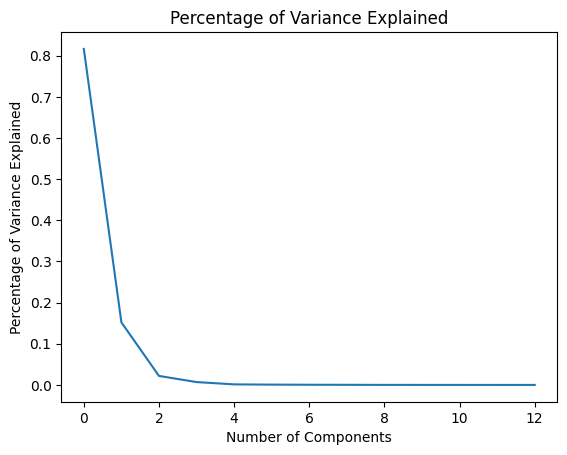

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')

- Up sampling, Down Sampling
 - down sampling: 데이터 수를 줄이기
 - up sampling: 늘리기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#파티셔닝 수행
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

pima_df = pd.read_csv("diabetes.csv")
pima_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
pima_df = pima_df.fillna(pima_df.median())
pima_df

pima_df.describe().transpose()
pima_df.groupby(["Outcome"]).count()
sns.pairplot(pima_df , hue='Outcome' , diag_kind = 'kde')

 - Up sampling

In [ ]:
array = pima_df.values
X = array[:,0:7]
Y = array[:,8]
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

#Synthetic Minority Over Sampling Technique
#SMOTE for upsampling smaller cases
print("Before UpSampling, counts of label '1':",sum(y_train==1))
print("Before UpSampling, counts of label '0':",sum(y_train==0))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label '1'", sum(y_train_res==1))
print("After UpSampling, counts of label '0'", sum(y_train_res==0))

print('After UpSampling, the shape of train_X', X_train_res.shape)
print('After UpSampling, the shape of train_y',y_train_res.shape)

Before UpSampling, counts of label '1': 184
Before UpSampling, counts of label '0': 353
After UpSampling, counts of label '1' 353
After UpSampling, counts of label '0' 353
After UpSampling, the shape of train_X (706, 7)
After UpSampling, the shape of train_y (706,)


In [ ]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

0.7619047619047619
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       147
         1.0       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

[[131  16]
 [ 39  45]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# fit model on upsampled data

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.7662337662337663
[[111  36]
 [ 18  66]]
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.80       147
         1.0       0.65      0.79      0.71        84

    accuracy                           0.77       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.78      0.77      0.77       231



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 - Down Sampling

In [ ]:
#Down Sampling the larger class
non_diab_indices = pima_df[pima_df['Outcome'] == 0].index   # Get the record numbers of non-diab cases
no_diab = len(pima_df[pima_df['Outcome'] == 0])             # how many non-diab cases
print(no_diab)

diab_indices = pima_df[pima_df['Outcome'] == 1].index       # record number of the diabeteics cases
diab = len(pima_df[pima_df['Outcome'] == 1])                # how many diabetic cases
print(diab)

random_indices = np.random.choice( non_diab_indices, no_diab - 200 , replace=False)    #Randomly pick up 200 non-diab indices
down_sample_indices = np.concatenate([diab_indices,random_indices])  # combine the 200 non-diab indices with diab indices

pima_df_down_sample = pima_df.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
pima_df_down_sample.shape
pima_df_down_sample.groupby(["Outcome"]).count()  # look at the class distribution after downsample

500
268


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,300,300,300,300,300,300,300,300
1,268,268,268,268,268,268,268,268


In [ ]:
array = pima_df_down_sample.values
X = array[:,0:7]
Y = array[:,8]
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

print('After DownSampling, the shape of X_train: ',X_train.shape)
print('After DownSampling, the shape of X_test: ',X_test.shape)

# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

After DownSampling, the shape of X_train:  (397, 7)
After DownSampling, the shape of X_test:  (171, 7)
0.783625730994152
[[81 17]
 [20 53]]
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81        98
         1.0       0.76      0.73      0.74        73

    accuracy                           0.78       171
   macro avg       0.78      0.78      0.78       171
weighted avg       0.78      0.78      0.78       171



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # 2. 지도학습
 ## Tree 기반 지도학습: Decision Tree와 Ensemble(Bagging, Boosting)
 - DT는 쉽고 유연하게 적용될 수 있는 알고리즘
 - 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
 - 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가지게 되면 과적합(Overfitting)이 발생

 - 앙상블: 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상
 - DT가 좋은 약한 학습기로 사용 (GBM, LightGBM etc)


### 결정트리(Decision Tree)

- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델.
- if/else 로 스무고개?
- 매, 펭귄, 돌고래, 곰 분류
<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

 - 특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 함.

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>

 - 많은 규칙이 있으면 분류를 결정하는 방식이 복잡해짐: 과적합



- Purity?

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>


 - 위 그림에서는 C > B > A 순으로 균일도가 높다고 할 수 있음. C는 모두 파란색 공으로 데이터가 모두 균일한 상태. B의 경우는 일부의 하얀색 공을 가지고 있지만 대부분 파란색 공으로 구성되어 있어 C다음으로 균일도가 높음. 이러한 데이터 세트에서 균일도는 분류 성능에 대한 정보를 제공

 - 정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수

- 불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 의미. 아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높음. 즉, 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮음. 위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮은 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높음.


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


 - 한 범주에 하나의 데이터만 있다면 불순도가 최소(혹은 순도가 최대)이고, 한 범주 안에 서로 다른 두 데이터가 정확히 반반 있다면 불순도가 최대(혹은 순도가 최소).
결정 트리는 불순도를 최소화(혹은 순도를 최대화)하는 방향으로 학습을 진행.

 - 엔트로피(Entropy): 불순도(Impurity)를 수치적으로 나타낸 척도. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮음을 의미. 엔트로피가 1이면 불순도가 최대. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있음. 엔트로피가 0이면 불순도는 최소. 한 범주 안에 하나의 데이터만 있음

 - 정보 이득(Information Gain): 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할

 - 지니 계수(Gini Index): 불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석 되어, 계수가 낮은 속성을 기준으로 분할. A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0. 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1

#### Tree 기반 알고리즘의 주요 hyperparameter

1. max_depth
 - 트리의 최대 깊이를 규정
 - defualt 는 None.None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가시킴.
 - 깊이가 깊어지면, min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

2. max_features
 - 최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 만큼 선정.
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정

3. min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어, 1로 설정하는 경우 분할되는 노드가 많아져서 과적합 가능성 증가
4. min_samples_leaf
 - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 클래스의 데이터가 극도로 작을 수 있으므로, 이 경우는 작게 설정 필요.

5. max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수.

- 예제 학습데이터

In [2]:
import pandas as pd
# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]},
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)


  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


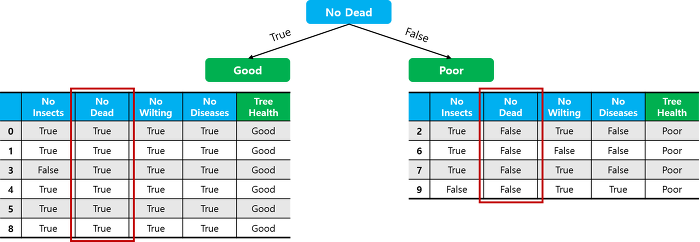

# DT의 시각화


In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf=6,random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
iris_data.target
iris_data.data

In [8]:
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

(30, 4)

In [9]:
# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=156)

In [11]:
dt_clf.predict(X_test)
dt_clf.score(X_test, y_test)
dt_clf.score(X_train, y_train)
dt_clf.feature_importances_
#dt_clf.tree_

array([0.        , 0.        , 0.56711123, 0.43288877])

In [ ]:
#data.csv를 읽으셔서 rf, adaboost, gb 모형결과를 비교해보세요.
df = pd.read_csv("data.csv")#, index_col=0)
X = df.drop("Pass.Fail", axis=1)
y = df["Pass.Fail"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier   #dt = DecisionTreeClassifier(max_depth=4) #dt.fit(X_train_res, y_train_res)
rf = RandomForestClassifier(n_estimators=200, max_depth=4)
rf.fit(X_train_res, y_train_res)
ab = AdaBoostClassifier(n_estimators=20)
ab.fit(X_train_res, y_train_res)
gb = GradientBoostingClassifier(n_estimators=20, max_depth=4)
gb.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)#y_pred_dt = dt.predict(X_test)
y_pred_ab = ab.predict(X_test)
y_pred_gb = gb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_gb))

In [ ]:
#mortdefault.zip 업로드 후 압축해제
#!unzip 파일이름.zip
!unzip mortDefault.zip

In [ ]:
import numpy as np
df = pd.read_csv("mortDefault.csv")
df.creditScore.replace( 'qqq',np.nan, inplace=True)
df.creditScore.replace( '@@@',np.nan, inplace=True)
df.isnull().mean()
df.dropna( inplace=True )
df.creditScore = df.creditScore.astype(int)

In [ ]:
df1 = df.sample( 10000 )

In [ ]:
y = df1.default
X = df1.drop(["year", "default"], axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.1, k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

gv = GridSearchCV( estimator=AdaBoostClassifier(),
    param_grid = {"n_estimators":[40,50,60]},
    scoring="accuracy", cv=10, verbose=0)

gv.fit(X_train_res, y_train_res)

In [ ]:
# df.sample( 10000 ) #랜덤하게 10000개로 샘플링
#Y: default...
#X: year는 삭제, 나머지
#search 사용하셔서 최적의 모형 찾아보세요

#RandomForest, n_estimators, max_depth에 대해서 GridSearch
#n_esti,,,: 50,75,100, max_depth: 3,4,5, k: 5
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[50, 75, 100], 'max_depth':[3,4,5]}

gv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid = params,
    cv = 5,
    scoring='accuracy',                #precision, recall
    verbose=0)
gv.fit(X_train_res, y_train_res)

In [43]:
gv.best_score_
gv.best_params_
gv1 = gv.best_estimator_  #model
gv1.feature_importances_

In [51]:
from sklearn.model_selection import RandomizedSearchCV
rv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                        param_distributions=params,
                        n_iter=5,
                        cv=5,
                        scoring='accuracy',
                        verbose=10)
rv.fit(X_train_res, y_train_res)
rv.best_estimator_ #rv.best_score_, rv.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START max_depth=4, n_estimators=100...............................
[CV 1/5; 1/5] END max_depth=4, n_estimators=100;, score=0.717 total time=   1.1s
[CV 2/5; 1/5] START max_depth=4, n_estimators=100...............................
[CV 2/5; 1/5] END max_depth=4, n_estimators=100;, score=0.739 total time=   0.7s
[CV 3/5; 1/5] START max_depth=4, n_estimators=100...............................
[CV 3/5; 1/5] END max_depth=4, n_estimators=100;, score=0.723 total time=   0.6s
[CV 4/5; 1/5] START max_depth=4, n_estimators=100...............................
[CV 4/5; 1/5] END max_depth=4, n_estimators=100;, score=0.730 total time=   0.6s
[CV 5/5; 1/5] START max_depth=4, n_estimators=100...............................
[CV 5/5; 1/5] END max_depth=4, n_estimators=100;, score=0.742 total time=   0.6s
[CV 1/5; 2/5] START max_depth=3, n_estimators=50................................
[CV 1/5; 2/5] END .max_depth=3, n_estimators=50;,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 75, 100]},
                   scoring='accuracy', verbose=10)

In [34]:
rf.feature_importances_
gb.feature_importances_

array([0.32684791, 0.51455129, 0.1586008 ])

In [25]:
dt.feature_importances_

array([0.14843885, 0.32232108, 0.52924007])

In [23]:
from sklearn.tree import export_graphviz
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt, out_file="tree.dot", feature_names = X.columns, impurity=True, filled=True)

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.567 0.433]
sepal length (cm) 0.0
sepal width (cm) 0.0
petal length (cm) 0.5671112274284718
petal width (cm) 0.4328887725715282


<Axes: >

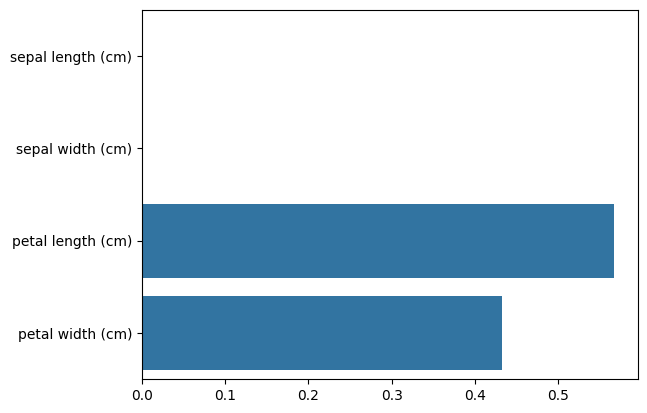

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print(name, value)

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

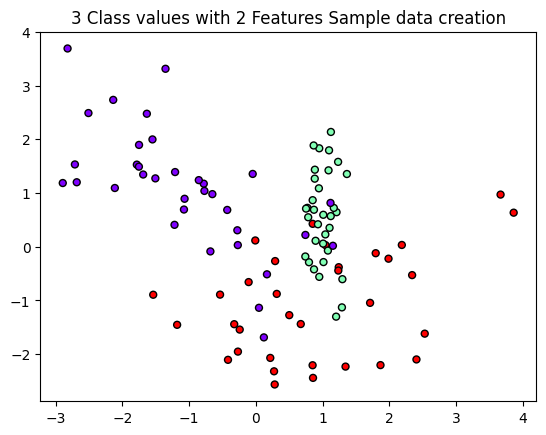

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

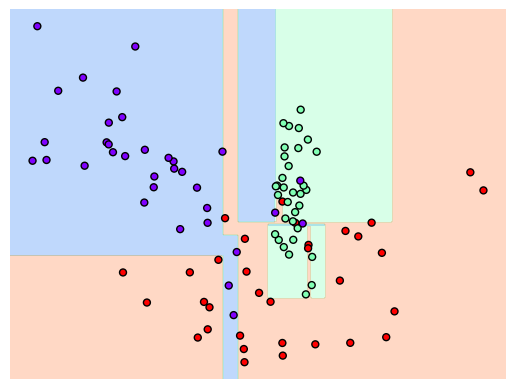

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

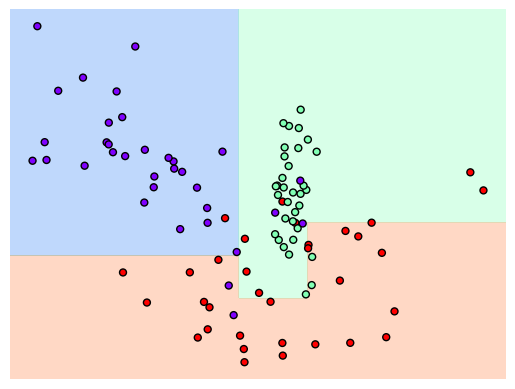

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### DT의 과대 적합을 최소화

1. 사전 가지치기(Pre-pruning)



<figure>
<img src='http://i.imgur.com/MVFcKwz.png' width=500 height=500>
</figure>



2. DT 이후 데이터 포인트가 적은 노드를 삭제 또는 병합

- Scickit-learn에서 결정트리는 DecisionTree Regressor와 DecisionTreeClassifier이 구현 되어 있음



### Cancer 데이터로 살펴보는 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # stratify : target:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [ ]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

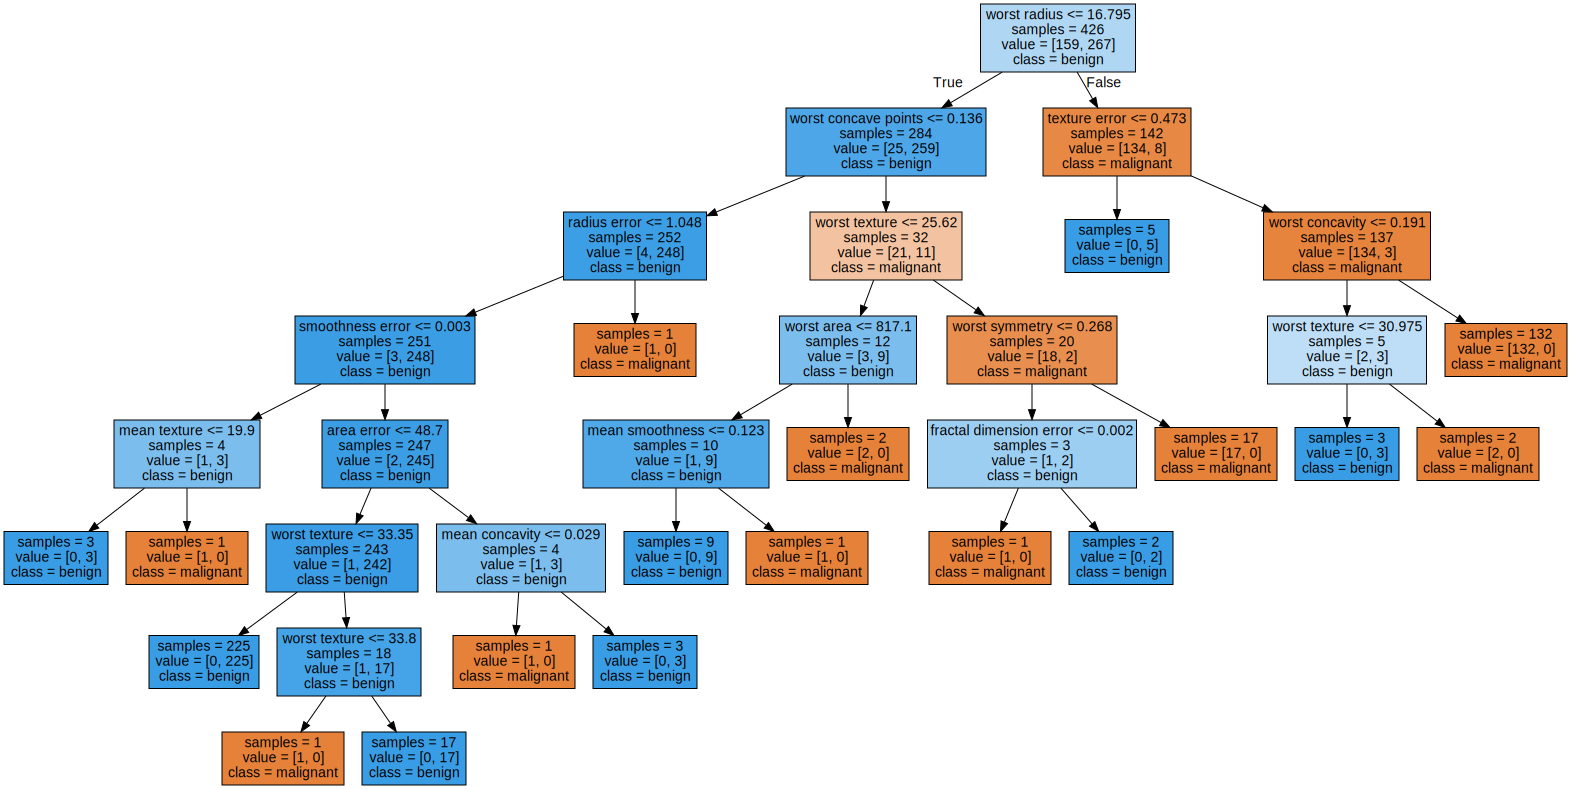

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- Feature Importance in trees

In [ ]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


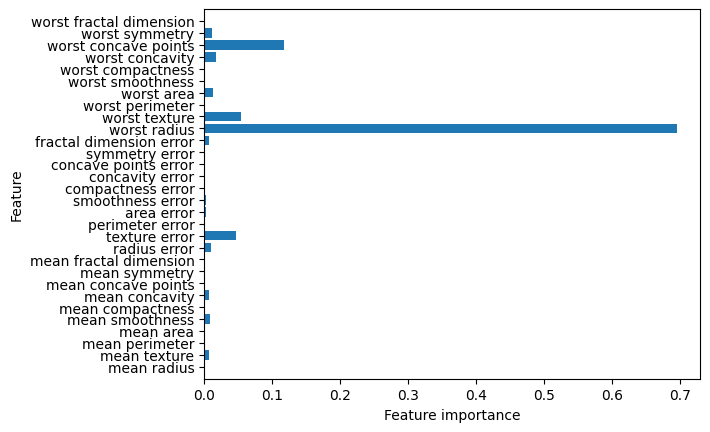

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

## 3. 랜덤 포레스트(Random Forest)

- 랜덤 포레스트는 **배깅 방법**을 적용한 결정트리(Decison Tree)의 앙상블

- 랜덤 포레스트 알고리즘은 **결정트리(Decision Tree) 분류기 여러 개를 훈련**시켜서 그 결과들을 가지고 예측을 함. 각각의 결정트리를 훈련시킬 때 배깅(Bagging). 즉, 훈련 세트에서 중복을 허용하여 샘플링한 데이터셋을 개별 결정트리 분류기의 훈련 세트로 하여 훈련시키는 방식.


#### 장점
1. 분류, 회귀에서 가장 널리 쓰이는 알고리즘으로 성능이 좋고 정확도가 높다
2. 간편하고 빠르다.
3. 큰 데이터 셋에서도 잘 사용되며, 많은 입력 변수들을 다룰 수 있다.

#### 단점
1. 속도와 메모리 비용이 상대적(linear에 비해)으로 큼
(더 많은 트리 -> 정확도는 높아지나 시간과 리소스 소모가 큼)

2. 트리 깊이와 개수 설정을 잘못하여 과적합(Overfiting)발생.


<figure>
    <img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdQRp2AYzLvDCg88pi6c2CRYQ_6qNBGVDn7A&usqp=CAU' width=700 height=300>
</figure>



#### 배깅(Bagging)

- 통계학에서 중복한 허용한 리샘플링(resampling)을 부트스트래핑(boostraping)이라 하고 이와 반대로 중복을 허용하지 않는 샘플링 방식을 페이스팅(pasting)이라고 함.

- 배깅으로 만들어진 앙상블 모델은 결과들에 대한 편차가 크지 않고 안정적인 결과를 보여지도록 향상됨.

- 학습데이터가 원래 편향이 있다면 그로 인한 편향문제까지는 해결하지 못하지만 미지의 데이터(Unseen data)에 좋은 성능을 보이고 노이즈나 아웃라이어에 대해서도 강건



<figure>
    <img src='https://miro.medium.com/max/1678/1*Wf91XObaX2zwow7mMwDmGw.png' width=700 height=300>
</figure>



##  Hyperparameter
- n_estimators: 랜덤 포레스트 안의 결정 트리 갯수

 - n_estimators는 클수록 좋습니다.
 - 결정 트리가 많을수록 피팅, 하지만 그만큼 메모리와 훈련 시간이 증가.
Default는 10
 - max_features: 무작위로 선택할 Feature의 개수

-  max_features=n_features이면 30개의 feature 중 30개의 feature 모두를 선택해 결정 트리. bootstrap=True이면 30개의 feature에서 복원 추출로 30개.
-  특성 선택의 무작위성이 없어질 뿐 샘플링의 무작위성은 유지
-  bootstrap=True는 default 값
-  따라서 max_features 값이 크다면 랜덤 포레스트의 트리들이 비슷하게 되며 가장 두드러진 특성에 맞게 예측.
-  max_features 값이 작다면 랜덤 포레스트의 트리들이 서로 매우 다르며 오버피팅이 감소
-  max_features는 일반적으로 Defalut 값,  

- max_depth : 트리의 깊이

-  min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수

-  min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수

-  max_leaf_nodes : 리프노드의 최대 개수

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist.keys()

#1. 전처리
X = mnist.data
y = mnist.target
X.shape
y.shape

(1797,)

In [ ]:
import pandas as pd
pd.DataFrame(X).isnull().mean()
X_scaled = X/255

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2)


In [ ]:
#1. DT
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier().fit(X_train, y_train)
pred1 = model1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report( pred1, y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.90      0.84      0.87        32
           2       0.89      0.75      0.81        32
           3       0.83      0.85      0.84        40
           4       0.91      0.88      0.90        34
           5       0.79      0.81      0.80        42
           6       0.93      0.91      0.92        44
           7       0.75      0.86      0.80        28
           8       0.70      0.80      0.75        35
           9       0.74      0.74      0.74        34

    accuracy                           0.84       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.84      0.84      0.84       360



In [ ]:
#2. RF
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier().fit(X_train, y_train)
pred1 = model1.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report( pred1, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        27
           3       0.95      1.00      0.97        39
           4       1.00      1.00      1.00        33
           5       0.98      0.93      0.95        45
           6       0.95      1.00      0.98        41
           7       1.00      0.94      0.97        34
           8       0.95      0.93      0.94        41
           9       0.94      0.97      0.96        33

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



## 4. Hyper Parameter 탐색

In [ ]:
from sklearn import model_selection
from sklearn import metrics

param_grid = {
    "max_depth":[1,3,5,7,9]
}
#declaring GridSearchCV model
grid1 = model_selection.GridSearchCV(
    estimator = model1, #모형
    param_grid = param_grid,  #
    scoring = 'accuracy', #정분류율
    verbose = 10,
    n_jobs = 1,
    cv = 5      #k-fold CV, k값.
)
#fitting values to the gridsearchcv model
grid1.fit(X_train,y_train)

#printing the best possible values to enhance accuracy
print(grid1.best_params_)
print(grid1.best_estimator_)
#printing the best score
print(grid1.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START max_depth=1.................................................
[CV 1/5; 1/5] END ..................max_depth=1;, score=0.688 total time=   0.6s
[CV 2/5; 1/5] START max_depth=1.................................................
[CV 2/5; 1/5] END ..................max_depth=1;, score=0.729 total time=   1.0s
[CV 3/5; 1/5] START max_depth=1.................................................
[CV 3/5; 1/5] END ..................max_depth=1;, score=0.711 total time=   0.7s
[CV 4/5; 1/5] START max_depth=1.................................................
[CV 4/5; 1/5] END ..................max_depth=1;, score=0.676 total time=   0.8s
[CV 5/5; 1/5] START max_depth=1.................................................
[CV 5/5; 1/5] END ..................max_depth=1;, score=0.686 total time=   0.4s
[CV 1/5; 2/5] START max_depth=3.................................................
[CV 1/5; 2/5] END ..................max_depth=3;,

In [ ]:
#2. RF
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier().fit(X_train, y_train)
pred2 = model2.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report( pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.97      0.98        31
           2       1.00      1.00      1.00        27
           3       0.98      0.98      0.98        41
           4       1.00      1.00      1.00        33
           5       0.98      0.93      0.95        45
           6       0.95      1.00      0.98        41
           7       0.97      0.91      0.94        34
           8       0.90      0.92      0.91        39
           9       0.91      0.97      0.94        32

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [ ]:
from sklearn import model_selection
from sklearn import metrics

param_grid = {
    "n_estimators":[100,150,200],
    "max_depth":[1,3,5,7,9]
}

#declaring GridSearchCV model
grid2 = model_selection.GridSearchCV(
    estimator = model2,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5
)

#fitting values to the gridsearchcv model
grid2.fit(X_train,y_train)
#printing the best possible values to enhance accuracy
print(grid2.best_params_)
print(grid2.best_estimator_)
#printing the best score
print(grid2.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 1/5; 1/15] END max_depth=1, n_estimators=100;, score=0.660 total time=   0.4s
[CV 2/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 2/5; 1/15] END max_depth=1, n_estimators=100;, score=0.691 total time=   0.7s
[CV 3/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 3/5; 1/15] END max_depth=1, n_estimators=100;, score=0.672 total time=   0.4s
[CV 4/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 4/5; 1/15] END max_depth=1, n_estimators=100;, score=0.725 total time=   0.4s
[CV 5/5; 1/15] START max_depth=1, n_estimators=100..............................
[CV 5/5; 1/15] END max_depth=1, n_estimators=100;, score=0.760 total time=   0.4s
[CV 1/5; 2/15] START max_depth=1, n_estimators=150..............................
[CV 1/5; 2/15] END max_depth=1, n_estimator